In [1]:
%pip install minisom -q
%pip install tensorflow -q
%pip install matplotlib -q
%pip install seaborn -q
%pip install scikit-learn -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Importar las librerias necesarias

In [1]:
from minisom import MiniSom
import numpy as np
from PIL import Image
import math

## Funciones necesarias

Vamos a importar los datos

In [4]:
n_samples = 60000
Xi = np.zeros([n_samples, 784],np.float32)  # 28x28 = 784 dimensions

# Load MNIST dataset
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing needed:
# 1. Normalize to [0,1] range
X_train = X_train / 255.0
# 2. Reshape from (n_samples, 28, 28) to (n_samples, 784)
X_train_reshaped = X_train.reshape(X_train.shape[0], 784)[:n_samples]

# Assign to Xi
Xi = X_train_reshaped

# Assign to Yi
Yi = y_train[:n_samples]

print(Xi.shape)
print(Yi.shape)

2024-12-13 16:47:42.167205: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-13 16:47:42.172011: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-13 16:47:42.185185: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734126462.208752   34876 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734126462.215584   34876 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-13 16:47:42.241211: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

(60000, 784)
(60000,)


Usar la libreria SOM

In [6]:
max_iter = 5000
alpha_max = 0.5

som = MiniSom(x=20, y=20, input_len=784, sigma=1.0, learning_rate=alpha_max,activation_distance='euclidean',
              topology='hexagonal', neighborhood_function='gaussian')
som.random_weights_init(Xi)
som.train_random(data=Xi, num_iteration=max_iter)

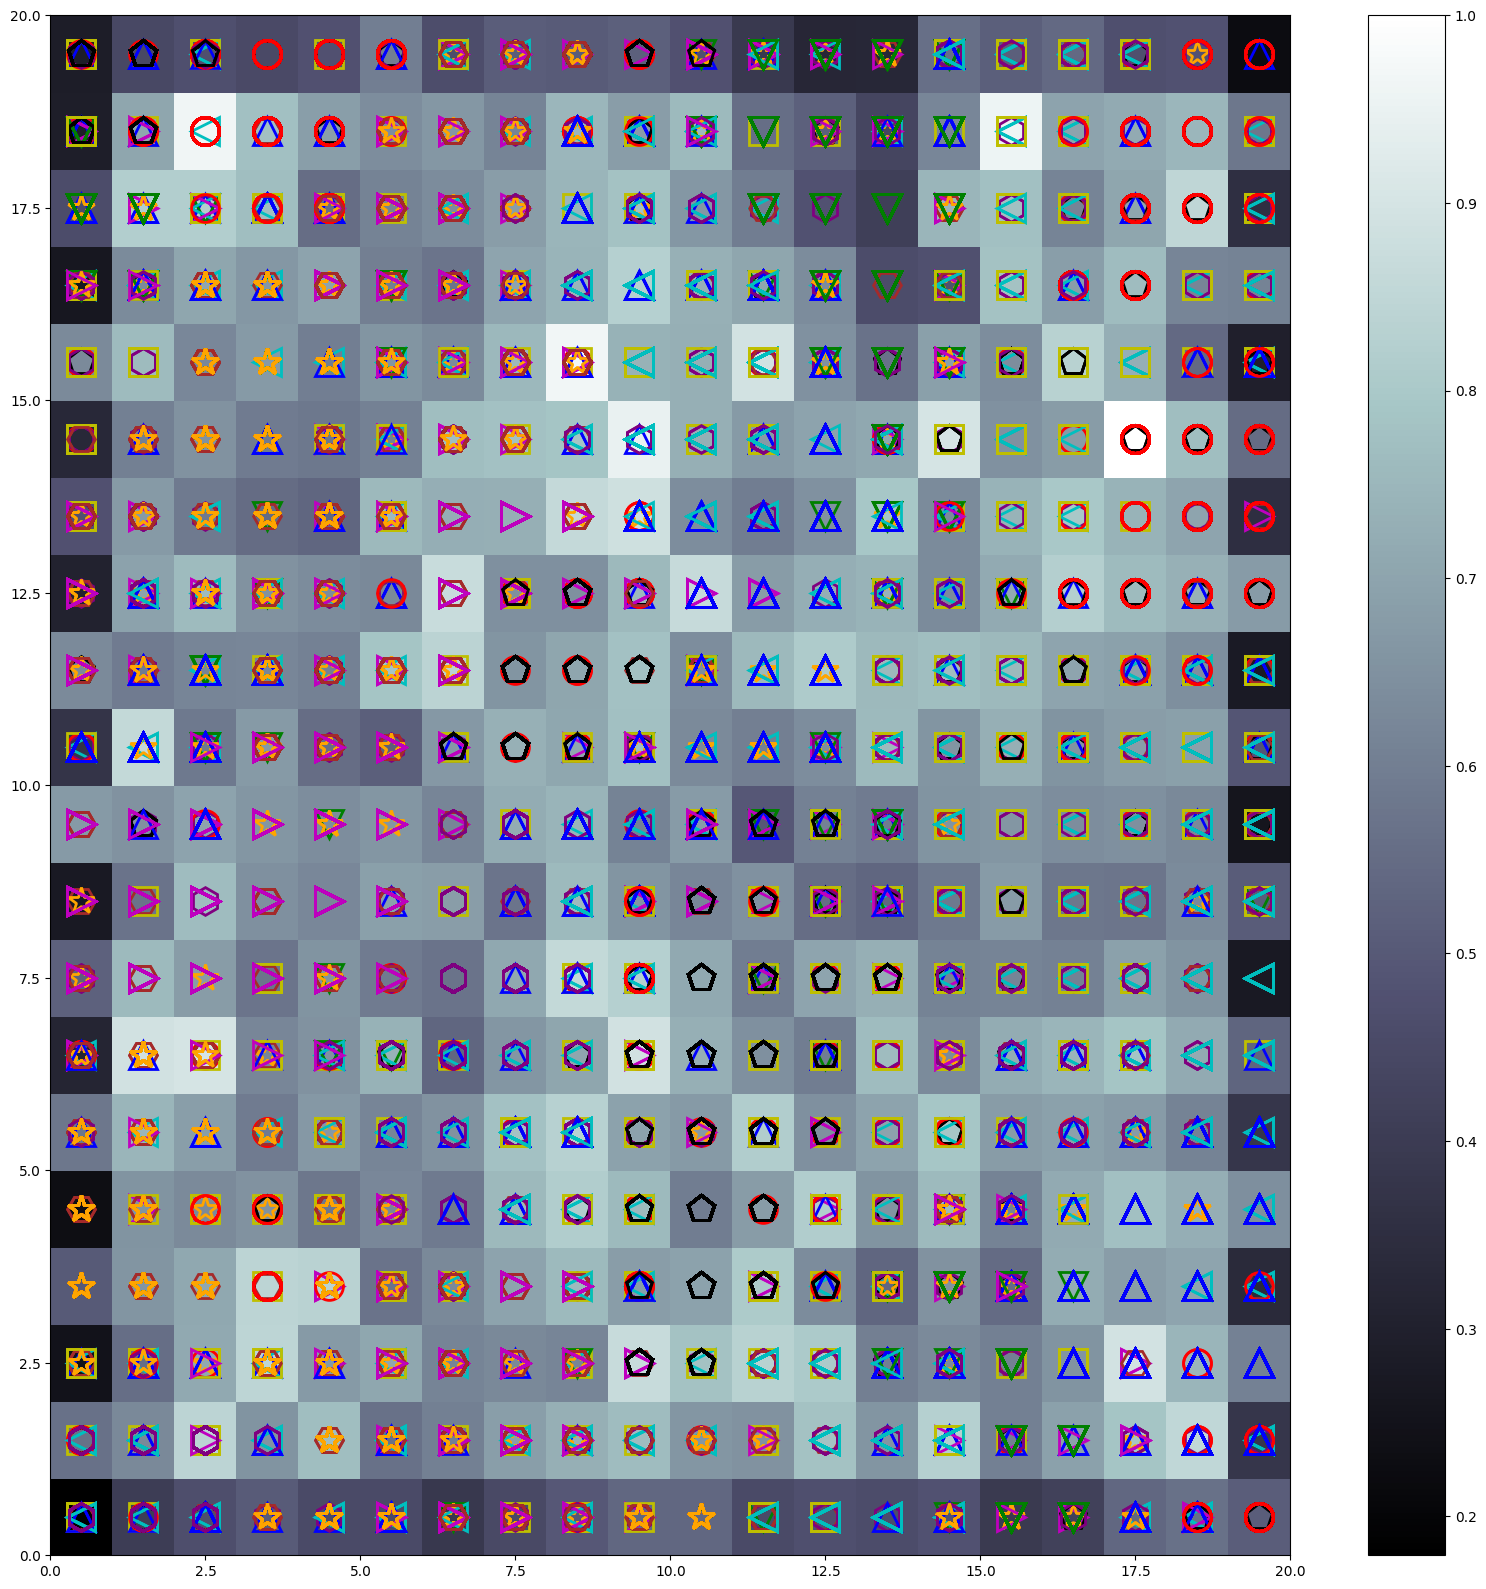

In [7]:
from pylab import bone, pcolor, colorbar, plot, show
from pylab import rcParams

# Configurar el tamaño de la figura
rcParams['figure.figsize'] = 20, 20

# Inicializar la figura
bone()

# Visualizar la matriz de distancias
pcolor(som.distance_map().T)

# Mostrar la barra de colores
colorbar()

# Crear una matriz para almacenar las etiquetas
valores = [0,1,2,3,4,5,6,7,8,9]
M = np.zeros([20,20],np.float32) - 1
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H']  # 10 markers
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']  # 10 colors

# Recorrer los datos y asignar las etiquetas
for i, x in enumerate(Xi):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[Yi[i]],
         markeredgecolor=colors[Yi[i]],
         markerfacecolor='None',
         markersize=20,
         markeredgewidth=2)
    M[w[0],w[1]] = Yi[i]
show()

In [17]:
print(M)

[[8. 8. 7. 7. 7. 7. 9. 4. 4. 4. 2. 4. 4. 9. 9. 5. 4. 1. 5. 6.]
 [8. 8. 7. 7. 7. 7. 7. 4. 4. 4. 2. 7. 3. 9. 7. 5. 4. 1. 6. 6.]
 [8. 8. 4. 7. 0. 7. 7. 4. 4. 2. 4. 2. 7. 7. 7. 7. 7. 0. 0. 6.]
 [7. 8. 7. 0. 0. 7. 4. 4. 4. 4. 4. 9. 9. 7. 7. 7. 7. 0. 0. 0.]
 [7. 7. 7. 7. 7. 5. 4. 4. 4. 4. 4. 9. 9. 7. 9. 7. 9. 9. 0. 0.]
 [7. 7. 4. 9. 8. 8. 8. 4. 4. 4. 4. 9. 0. 9. 2. 7. 4. 9. 7. 0.]
 [9. 7. 9. 9. 2. 8. 8. 8. 8. 8. 6. 4. 4. 4. 7. 5. 4. 9. 9. 9.]
 [4. 4. 4. 4. 3. 3. 8. 8. 8. 8. 6. 6. 6. 4. 9. 9. 9. 8. 9. 9.]
 [9. 9. 4. 4. 8. 3. 8. 8. 3. 2. 6. 6. 6. 4. 8. 9. 3. 2. 2. 9.]
 [7. 9. 6. 6. 6. 6. 6. 0. 0. 2. 2. 6. 9. 2. 3. 3. 3. 8. 3. 6.]
 [7. 9. 6. 6. 6. 6. 6. 6. 6. 4. 2. 2. 2. 3. 3. 3. 3. 8. 4. 6.]
 [3. 9. 3. 6. 6. 6. 6. 6. 6. 6. 2. 2. 2. 2. 3. 5. 3. 1. 1. 1.]
 [3. 3. 3. 6. 5. 6. 5. 6. 5. 6. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1.]
 [3. 3. 3. 5. 5. 5. 5. 6. 2. 8. 3. 5. 8. 2. 8. 1. 1. 1. 1. 1.]
 [7. 3. 8. 1. 4. 5. 8. 8. 5. 3. 5. 3. 8. 4. 5. 4. 5. 1. 1. 3.]
 [1. 1. 1. 4. 8. 8. 8. 8. 5. 5. 5. 5. 6. 5. 5. 5. 5. 3.

In [8]:
# Guardar la matriz M
import pickle
with open('M_matrix.pkl', 'wb') as f:
    pickle.dump(M, f)
print("M guardada en M_matrix.pkl")

M guardada en M_matrix.pkl


Visualizar los datos en la matriz index

## Guardar la matriz M

In [9]:
import pickle
with open('som_mnist.pkl', 'wb') as outfile:
    pickle.dump(som, outfile)

La comprobacion a partir de la matriz M

In [10]:
#  Preparar los datos de prueba (normalizar como lo hicimos con los datos de entrenamiento)
X_test = X_test / 255.0
X_test_reshaped = X_test.reshape(X_test.shape[0], 784)

# Crear un array de predicciones para los datos de prueba
Y_test_predicted = []

# Obtener las predicciones para los datos de prueba
for i in range(len(X_test_reshaped)):
    # Encontrar el ganador para cada muestra de prueba
    w = som.winner(X_test_reshaped[i])
    # Obtener la clase predicha basada en el ganador de la neurona
    Y_test_predicted.append(M[w])

# Convertir las predicciones a un array numpy
Y_test_predicted = np.array(Y_test_predicted)

# Calcular y mostrar métricas
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("Reporte de Clasificación para Datos de Prueba:")
print(classification_report(y_test, Y_test_predicted))


Reporte de Clasificación para Datos de Prueba:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       980
           1       0.97      0.98      0.97      1135
           2       0.92      0.79      0.85      1032
           3       0.79      0.86      0.82      1010
           4       0.75      0.80      0.77       982
           5       0.76      0.71      0.73       892
           6       0.91      0.95      0.93       958
           7       0.85      0.81      0.83      1028
           8       0.77      0.78      0.78       974
           9       0.71      0.74      0.72      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.84      0.84     10000



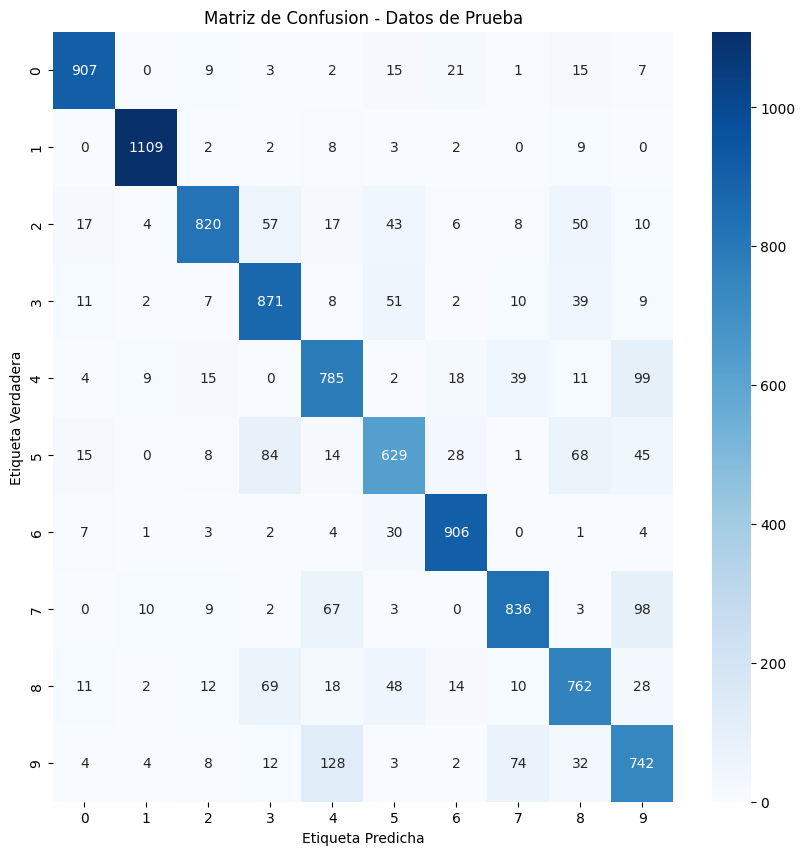


Exactitud General en Datos de Prueba: 83.67%


In [11]:
import matplotlib.pyplot as plt

# Create and plot confusion matrix
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, Y_test_predicted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusion - Datos de Prueba')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

# Calculate overall accuracy
accuracy = np.mean(Y_test_predicted == y_test)
print(f"\nExactitud General en Datos de Prueba: {accuracy*100:.2f}%")


### Abrir lo aprendido

In [12]:
with open("som_mnist.pkl", "rb") as tf:
    som_cargado = pickle.load(tf)

B = X_test_reshaped[70]
w = som_cargado.winner(B)
print(w)
print(M[w])#



(np.int64(2), np.int64(5))
7.0


In [13]:
B.shape

(784,)

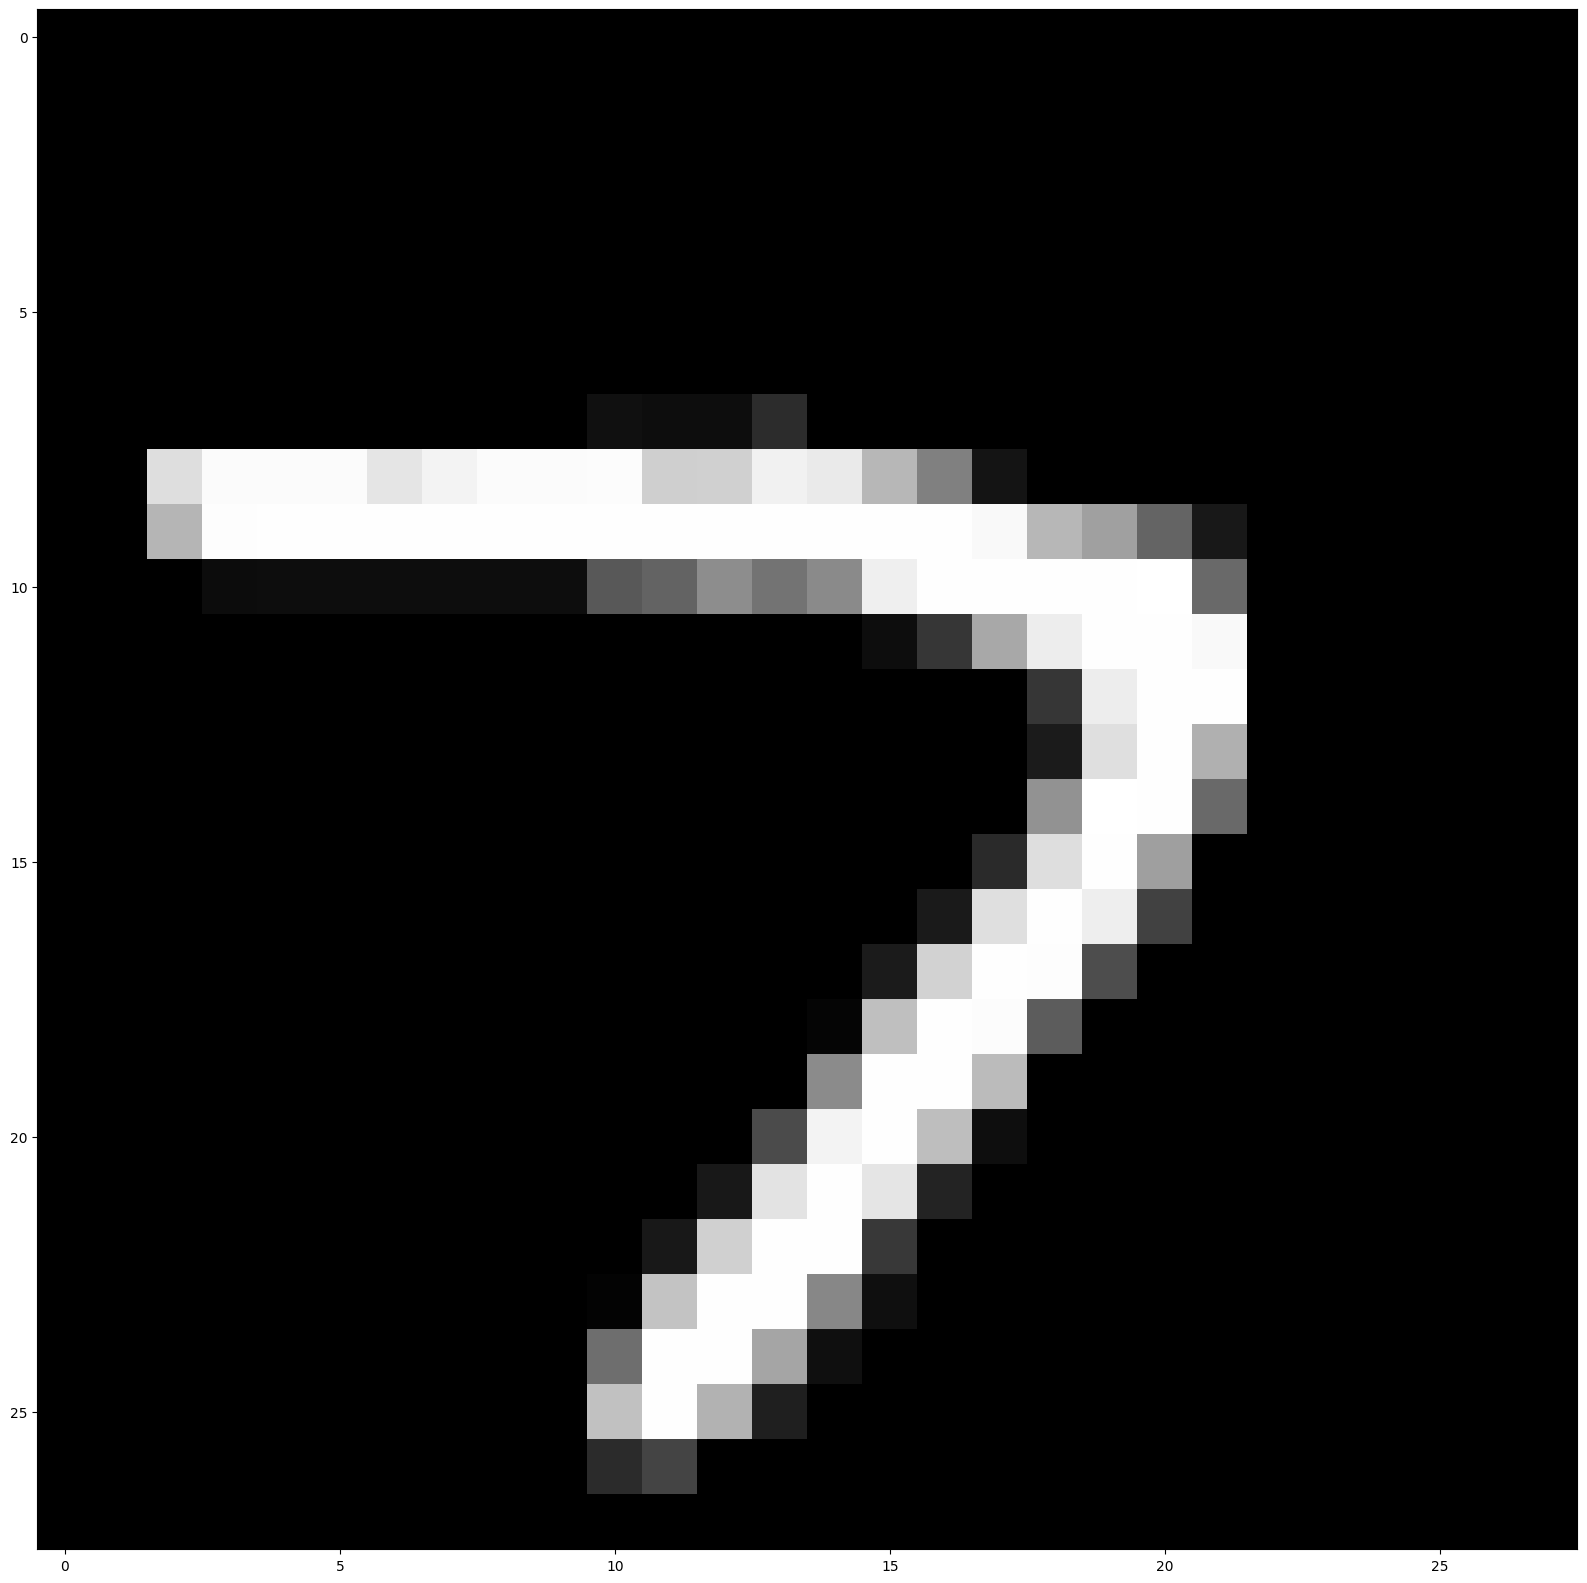

In [14]:
# Visualizar la imagen
plt.imshow(B.reshape(28, 28), cmap='gray')
plt.show()

## Probar con una imagen

In [15]:
# Convertir a escala de grises si es necesario
import cv2
image = cv2.imread('8.jpeg')

if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Redimensionar a 28x28
image = cv2.resize(image, (28, 28))

# Normalizar valores de píxeles
image = image / 255.0

# Remodelar para coincidir con la entrada del modelo (784 dimensiones)
image = image.reshape(784)

# Encontrar la neurona ganadora para esta imagen
w = som_cargado.winner(image)

# Obtener la etiqueta predicha
predicted_label = M[w]

print(f"La etiqueta predicha para la imagen es: {predicted_label}")


La etiqueta predicha para la imagen es: 8.0


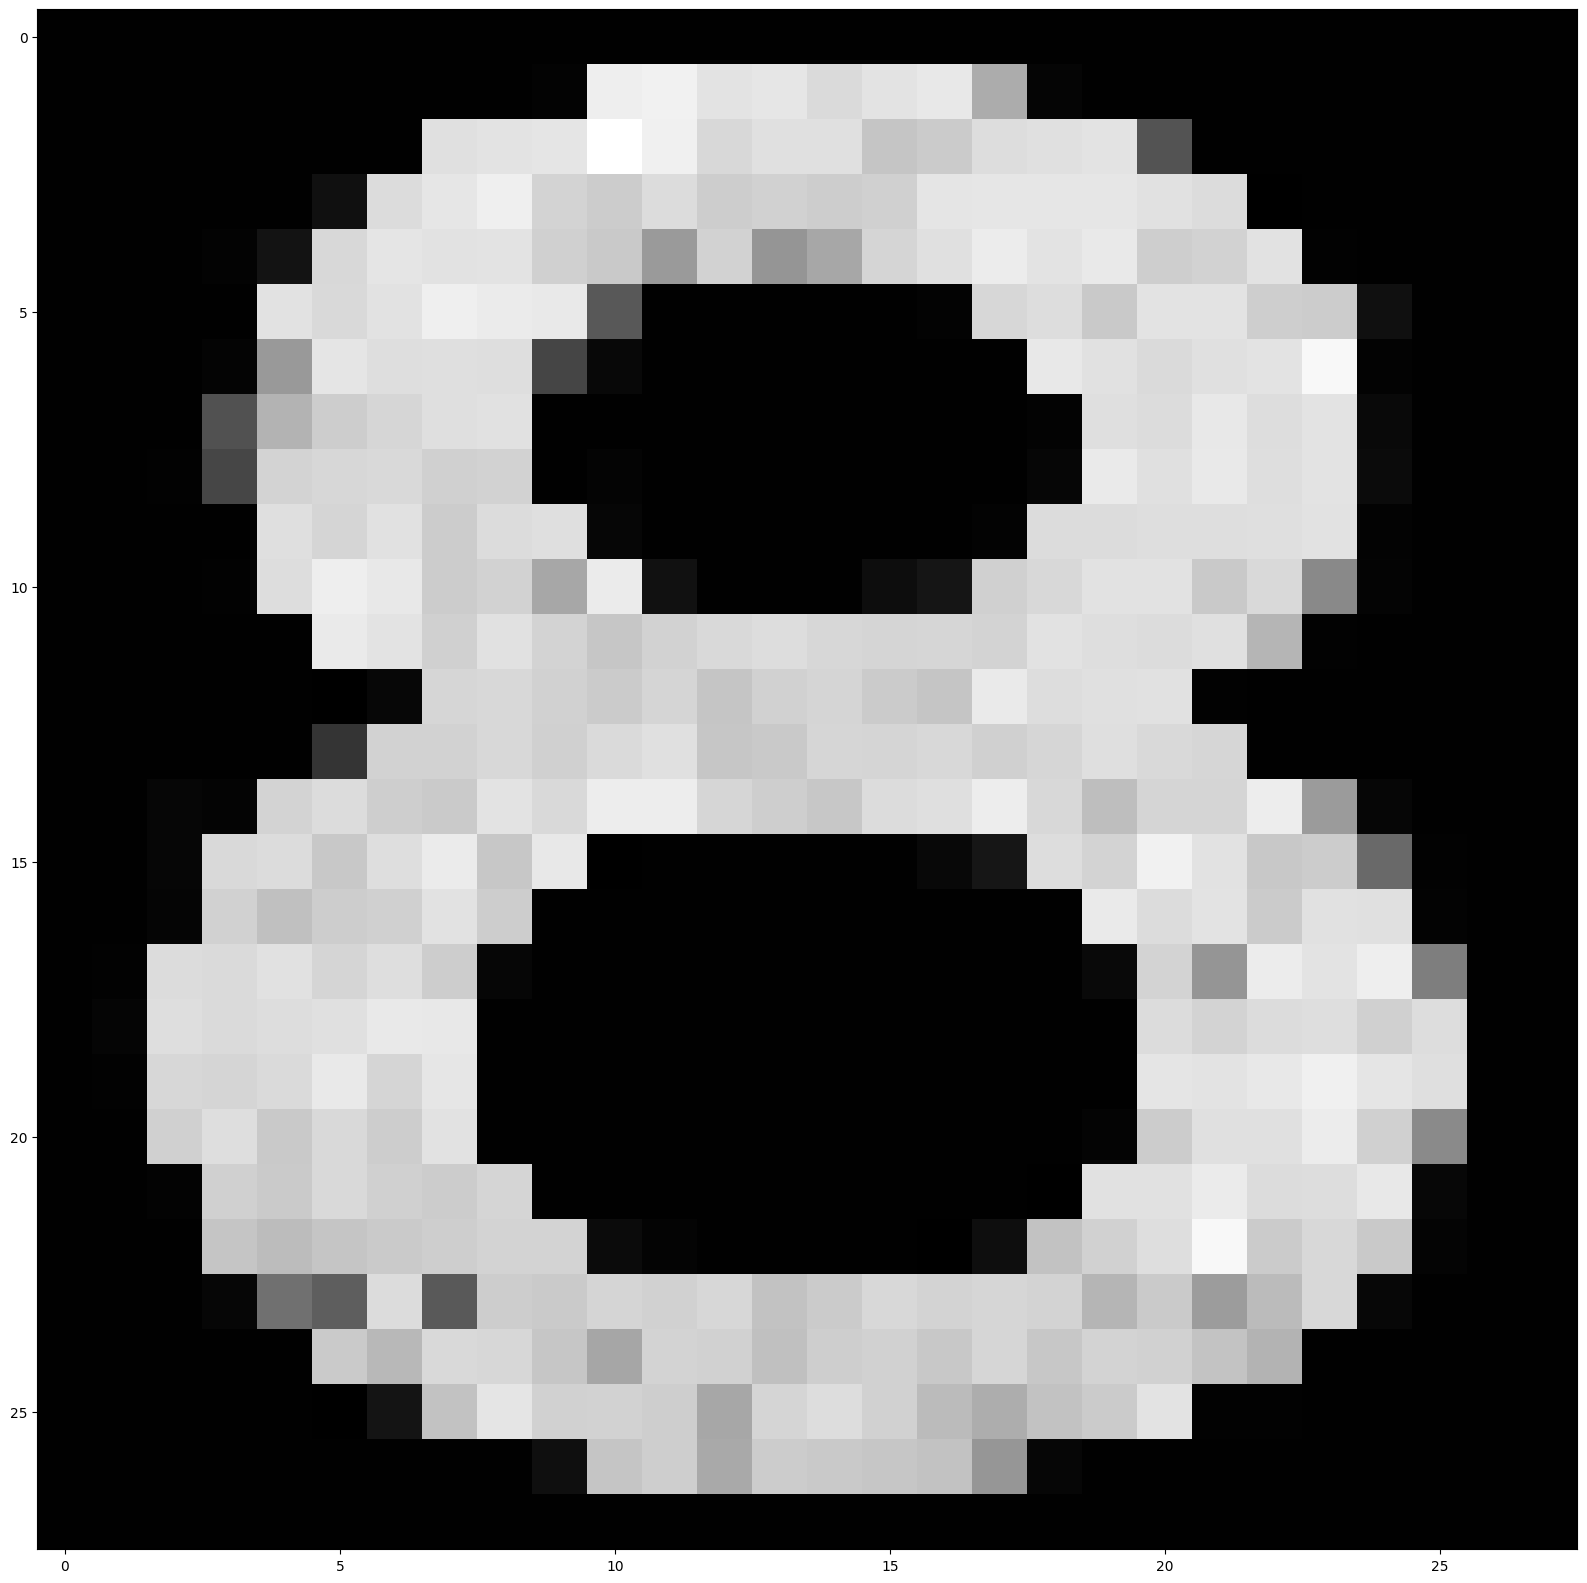

In [16]:
plt.imshow(image.reshape(28, 28), cmap='gray')
